<a href="https://colab.research.google.com/github/joshuavachon25/stras1920/blob/main/Stras1920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation
Tout d'abord, installons ma librairie GeOCR avec la commande suivante:



In [6]:
!pip install geocr

Cela installe toutes les dépendances nécessaire et permet à partir de maintenant d'utiliser mes classes pour tester notre processus.

Pour pouvoir utiliser nos fonctionnalités, il nous faut quand même un modèle d'entrainement de langue pour Tesseract (moteur OCR). Dans notre cas, nous installons deux langues, puisque le contexte alsacien n'est ni complètement dans l'une ni dans l'autre.

In [7]:
!apt-get install -y tesseract-ocr-fra tesseract-ocr-deu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-deu is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-fra is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Dernière chose à mettre en place, notre système de fichier. Pour notre part, nous utilisons Google Colab, donc, nous devons nous connecter à notre Drive pour accéder à nos archives.

Google Colab fonctionne avec des containers qui sont en quelques sortes des machines virtuelles. De ce fait, Google vous prête une machine linux. Pour utiliser Google Drive, nous allons "mount" le drive dans un des répertoires de la machine Linux. C'est un peu comme insérer une clé USB dans un ordinateur... Dans le cas présent, en lancant cette commande, une fenêtre s'ouvrira pour que vous acceptiez la connexion à votre Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Le dossier Content est celui par défaut lorsque vous ouvrez l'explorateur de fichiers.

# Rues de Strasbourg en 1920

La librairie est installé, mais nous devons l'importer pour commencer à l'utiliser:

In [9]:
from geocr import ArchiveCollection, ArchiveGeolocator, ArchiveImage, GeoExporter

Nous avons maintenant le nécessaire pour commencer à travailler sur des archives. Définissons une variable pour conserver le chemin vers nos archives. De cette manière, si vous testez ce notebook, vous n'aurez qu'un endroit à modifier pour récupérer vos propres données.

In [10]:
FOLDER_BASEPATH="/content/drive/My Drive/Mémoire/input/1920"

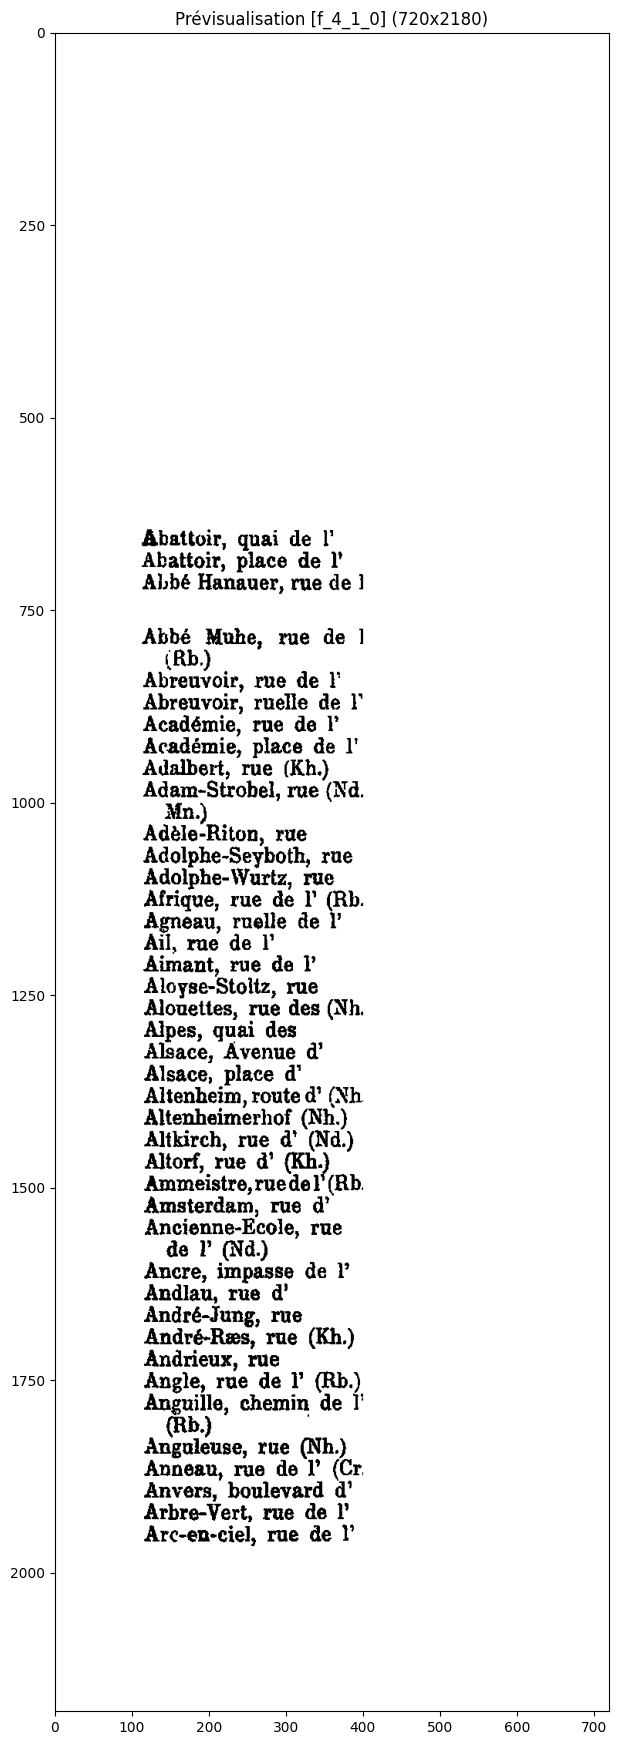

**f_4_1_0**

```
Abattoir, quai de l'  
Abattoir, place de l  
Abbé Hanauer, rue de 1  
Abbe Mühe, rue de | (Rb))  
Abreuvoir, rue de l  
Abreuvoir, ruelle de }’  
Académie, rue de l  
Académie, place de l'  
Adalbert, rue (Kh.)  
Adam-Strohel, rue (Nd. Mn.  
Adèle-Riton, rue  
Adolphe-Seyboth, rue  
Adolphe-Wurtz, rue  
Afrique, rue de I’ (Rb.  
Agneau, ruelle de l  
Aïl, rue de F  
Aimant, rue de l  
Aloyse-Stoltz, rue  
Alouettes, rue des (Nh.  
Alpes, quai des  
Alsace, Avenue d’  
Alsace, place d’  
Altenheim, route d’ (Nh.  
Altenheimerhof (Nh.)  
Altkirch, rue d’ (Nd.)  
Altorf, rue d’ (Kh.)  
Ammeistre, rue del'(Rb.  
Amsterdam, rue d’  
Ancienne-Ecole, rue  
de l (Nd.)  
Ancre, impasse de l  
Andlau, rue d’  
Andre-Jung, rue  
André-Ræs, rue (Kh.)  
Andrieux, rue  
Angle, rue de l (Rb.)  
Anguille, chemin de l' (Rb)  
Anguleuse, rue (Nh.)  
Anneau, rue de I’ (Cr.  
Anvers, boulevard d’  
Arbre-Vert, rue de !’  
Arc-en-ciel, rue de l’
```

In [ ]:
archive = ArchiveCollection(f"{FOLDER_BASEPATH}/Rue", split_template="50|50", split_orientation="vertical")
archive.get("f_4_1").sharpen().binarize().erode(kernel=1).dilate(kernel=2).mask(bottom = 150, right = 100, left = 91, top = 610)
archive.split_only(image_name="f_4_1", template="680|820")
archive.get("f_4_1_0").mask(right = 300).add_borders(t=10, b=10, l=20, r=20)
archive.get("f_4_1_0").show()
archive.get("f_4_1_0").ocr(language='fra+deu', config='--psm 4 --oem 1')
archive.get("f_4_1_0").clean(min_line_length=6).get_ocr_text()

# Traitement des acteurs du boire à Strasbourg en 1920
Dans le cadre de notre étude, nous avons distingué dix catégories d’acteurs intervenant dans le champ alimentaire, permettant de documenter plus finement la localisation des espaces de production, de transformation, de distribution et de consommation de boissons à Strasbourg en 1920. Ces catégories comprennent : les établissements spécialisés dans les articles de brasserie, les marchands et grossistes en vin, les brasseurs, les entrepôts et négociants en bière, les cafés-brasseries, les cidreries, les distilleries, les marchands de houblon, les malteries ainsi que les tonneliers.

1. Articles
2. Grossistes vins
3. Débits vins
4. Brasseurs
5. Entrepots et marchands de bièere
6. Cidreries
7. Distilleries
8. Houblons
9. Malteries
10. Tonneliers
11. Café-Brasserie
12. Café-Bars


In [11]:
FOLDER_BASEPATH="/content/drive/My Drive/Mémoire/input/1920"

In [12]:
archiveAdresses = ArchiveCollection(f"{FOLDER_BASEPATH}/Adresses", split_template="50|50", split_orientation="vertical")

In [15]:
rules = [
    (r'ï', 'i'), # Correction des i
    (r'œ', 'oe'), # Correction des oe
    (r'æ', 'ae'), # Correction des ae
    (r'\n{2,}', '@'),  # Remplacer les doubles sauts de ligne par un @
    (r'\n', ' ') , # Remplacer les sauts de lignes par des espaces
    (r'(?<=[a-zA-ZéèàùâêîôûçÉÈÀ])(?=\d)', ' ') , # Mettre des espaces devant les chiffres si précédé d'une lettre sans espace
    (r'-\s+', ''), # Retirer les - suivi d'espace
    (r'@', '\n'), # Remplace les @ par un saut de ligne
    (r',\s*[lt][éèe][lt][^\n]*(?=\n)', ''), # Retirer tout ce qui vient avec , tel (r',?\s*[lt][éèe][lt][^\n]*(?=\n)', '')
    (r',\s*t(?:é|è|e)?l[^\n]*$', ''), # Meme chose, mais en fin de paragraphe
    (r'(rug|r\.|rue)', 'rue'), # Corrige la graphie de rue
    (r'(\ssuce.|\ssuce)', 'succ.'), # Correction des i
    (r'(chemin|chem\.)', 'chemin'), # Corrige la graphie de rue
    (r'(place|pl\.)', 'place'), # Corrige la graphie de place
    (r'(?<=[a-zéèàùâêîôûçÉÈÀ])(?=[A-Z])', ' ') # Mettre un espace entre une lettre minuscule et une majuscule
    #(r'.*(Sch\.|Schiltigheim|Koenigshoffen).*(?:\n|$)', ''),
]

In [16]:
articles_brasseries = archiveAdresses.subset(imgs=["f_509_1"])
# articles_brasseries.get("f_509_1").show(grid=True)
articles_brasseries.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
articles_brasseries.get("f_509_1").mask(bottom = 264, right = 954, left = 160, top = 370)
# articles_brasseries.get("f_509_1").show()
articles_brasseries.get("f_509_1").ocr(language="fra+deu", config='--psm 6 --oem 1 -c preserve_interword_spaces=1')
data2 = articles_brasseries.get_ocr_text()
articles_brasseries.clean(rules=rules)
data = articles_brasseries.get_ocr_text()



```Bayer Jules, 86, rue de la  
Krutenau et 27, r. de Zurich,  
tél. 1286 (voir annonce).  
  
Bentz André, 2, place Clément,  
tél. 2308.  
  
Binder Aug. & Jos., 3, rue du  
Noyer, lél. 1799.  
  
Debus Théoph., 3, r. Principale,  
Sch., tel. 218.  
  
Hauser & Degermann, 8, rue  
du Chemin de fer, Kœnigs-  
hoffen, tél. 3075.  
  
Kœhl Xavier, 2, pl. de Pierres,  
tél. 1398.  
  
Lacher Osc., 38, rue du Faubg.  
de Saverne, tél 3334.  
  
Lepain Guill., 7, r. de la Chaîne  
et 14, rue des Cordonniers,  
  
- tél. 765.  
  
Lohner Ed., 10, rue Kuhn,  
tél. 2591 (voir annonce sous  
Installations.  
  
Manufacture Alsacienne de  
Caoutchouc, anct.R.Nedder-  
mann, propr. P. Semmlitz,  
tel. 72 (voir annonce sous  
Articles techniques).  
  
Manufacture Lorraine de  
Caoutchouc, Victor Lacroix,  
anct. Fr. Stubert, tél. 84£  
(voir annon. s. Caoutchouc).  
  
Mobs C. & E, 7-11, rue des  
Avougles, tél. 843.  
  
Quiri & Cie, Schiltigheim.  
tél. 2891 {voir annonce sous  
Froid industriel.  
  
Sænger Edouard, 12, quaï des  
Pécheurs.  
  
Schmitt Henri, 5, rueSt-Louis,  
tel. 2891 (voir annonce sur  
pap. coul.).  
  
Stein Henri, anct. Kusterer  
‚fröres, 22, rue Kuhn et22, rug  
Thiergarten, tél 851 (voir  
annonce).  
  
Zetzner Henri, 9, rue de la  
Douane, tel. 1352.  
  
Zetzner Henri, Vve, 28, rue du  
Vieil-Hôpital, tél. 1394.
```

```Bayer Jules, 86, rue de la Krutenau et 27, rue de Zurich  
Bentz André, 2, place Clément  
Binder Aug. & Jos., 3, rue du Noyer  
Debus Théoph., 3, rue Principale, Sch.  
Hauser & Degermann, 8, rue du Chemin de fer, Koenigshoffen  
Koehl Xavier, 2, place de Pierres  
Lacher Osc., 38, rue du Faubg. de Saverne  
Lepain Guill., 7, rue de la Chaîne et 14, rue des Cordonniers  
Lohner Ed., 10, rue Kuhn  
Manufacture Alsacienne de Caoutchouc, anct.R.Neddermann, proprue P. Semmlitz  
Manufacture Lorraine de Caoutchouc, Victor Lacroix, anct. Frue Stubert  
Mobs C. & E, 7-11, rue des Avougles  
Quiri & Cie, Schiltigheim. tél. 2891 {voir annonce sous Froid industriel.  
Saenger Edouard, 12, quai des Pécheurs.  
Schmitt Henri, 5, rue St-Louis  
Stein Henri, anct. Kusterer ‚fröres, 22, rue Kuhn et 22, rue Thiergarten  
Zetzner Henri, 9, rue de la Douane  
Zetzner Henri, Vve, 28, rue du Vieil-Hôpital
```

In [ ]:
vins = archiveAdresses.subset(imgs=["f_697_0","f_697_1", "f_700_0", "f_701_0", "f_701_1"])
vins.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
vins.get("f_697_0").rotate(0.4).mask(bottom = 2144-1420, right = 80, left = 1025, top = 725)
vins.get("f_697_1").mask(bottom = 2144-1960, right = 1496-1340, left = 100, top = 1144)
vins.get("f_700_0").mask(left=1055, top=180, right= 40, bottom=144)
vins.get("f_701_0").rotate(0.8).mask(left=200, top=1130, right= 30, bottom=2144-1700)
vins.get("f_701_1").mask(left=100, top=620, right=1496-1320, bottom=2144-1460)
vins.split_only(image_name="f_697_1", template="530|400|566")
vins.split_only(image_name="f_700_0", template="1000|1144", orientation="horizontal")
vins.split_only(image_name="f_701_0", template="650|400|446")
vins.split_only(image_name="f_701_1", template="510|400|556")
vins.get("f_697_1_0").mask(right=10).add_borders(right=50)
vins.get("f_697_1_1").mask(right=10).add_borders(right=30)
vins.get("f_697_1_2").mask(left=5).add_borders(left=60)
vins.get("f_700_0_0").mask(bottom=325)
vins.get("f_700_0_1").mask(top=490)
vins.get("f_701_0_0").mask(right=10).add_borders(right=50)
vins.get("f_701_0_1").mask(right=5).add_borders(right=70, left=70)
vins.get("f_701_0_2").mask(left=5).add_borders(left=60)
vins.get("f_701_1_0").mask(right=10).add_borders(right=50)
vins.get("f_701_1_1").mask(right=14).add_borders(left=50)
vins.get("f_701_1_2").mask(bottom=2144-1080).add_borders(left=50)

vins.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = vins.get_ocr_text()

```Association des Négôciants en vins d'Alsace, président Mr, Ed, Lechten, 77, Grand’rue  
Association Centrale d. Vignerons Alsaciens-Lorrains, 9, rue de Hausbergen, Sch.; directeur Louis Brun.  
Baffay Victor, 26,rue Thiergarten  
OSCAR BLINDT  
AGENT-GÉ NÉ RAL des Elabl. du Solo Vinlcoée à Narbonne 11, rue d'Ingwiller  
Bloch & Marx, 15, quai Kléber  
Briccos E., Vve, 4, rue des Cigognes.  
Briottet Ed., agence. pour l'Alsace, 13, rue du Maréchal Foch (voir annonce).  
Vins (suite).  
L. Bucherer Cadet, 7, rue de PEpine  
Caubaud Henri, 5, boulevard de Lyon.  
P. Cossé & Cie, champagne, Epernäy et Piastatt, agent général: J. Metz, 1, rue d’Andlau, Sch., (v. annonce).  
Colombé H, C. Albert, 44, rue de la Course  
C 9, rue d, Vioux-Marché-aux-Vins, Représentant des misons: Etablissements Raspail Cognac Balluteaud, Munier à Dijon,  
Bisquey d’Arraing à Bordeaux um, Mans ef vius fins de rdesux), Emmanuel Grivelet et Als & Vosne Romende (vins de Bourgogne).  
Douvier Lucien, 16, rue des  
Veaux.  
Dieifuss L., 101, Grand’rue  
Dumere & Estève, commission, consignation, transit, 6, rue dn Général Gouraud.  
Falk Jul.,19a,rued. Polygone, Nd.  
Fausser K., 2, rue d. Serruriers.  
Fleig Fréd., 16-18, rue Ste-Hélène  
Frenzel Osc. Aug., agent-generale, 18, rue Auguste-Lamey, te L 4768.  
Grandes Caves de France et d'Alsace, 24, rue d'Austerliiz.  
Grde. Distillerie Alsacienne Pfister & Daul, 21, boulev. du Presid. Wilson  
Grégoire & Cie, 28, rue Brülde.  
Haegeli Emile, 16, boulev. de Lyon  
Hatt Louis, 18, rue des Juifs.  
Hansjacob Albert, 12, boulev. Clemenceau.  
Henric Fortuné, 10, rue St Catherine.  
Hefermehl C. Albert, Schnorr succ, 24, avenue de la Marseillaise  
Hubster V.,7, rued. Parchemin  
Joseph Ernest, W., 16, rue du Faubourg de Pierres.  
CARLOS JOYCE  
Vins en gros  
9, rue  Salzmann : # TÉ LÉ PHONE 660. :: ::  
Karcher Louise, 10, rue des Veaux  
Kehren J.&E. Gérard, Maison: principale: 77, Grand’rue;  
ul.). Kleefeld | Fequés, 20, r, Oberlin.  
Kuhff & Cie., À, & E., Maison principale : 6, rue de la Nuée Bleue  
Kurz F. A., prop. A. Kurz, 18, rue d'Austorlitz  
Levi Louis et Cie, 12, boulev. du Présid. Wilson  
Loeb L. E., suce., 49, rue du Faubourg-National  
Millet Paul, 21, rue de la Nuée-Bleue  
Mulhauser frères & Cie, (agents généraux), 14, rue du 22 Novembre  
Oppenheimer Mayer, 5, allée de la Robertsau  
Paris Pierre, 24, rue de 23 Novembre.  
Päster & Daul, 21, bouley. du Présid. Wilson  
Preuss Gust., 14, rue Kageneck.  
Renonard Marcel, 4, rue de la Krutenau.  
Rietseh Lucien, 3, rue d. Tripiers. Schmitter  Philippe,  14, rue ‘de Barr  
VIAL EUGÈ NE 2, rue du Faubourg-National. Représentant des Maisons: . Margnat Frères, Sauvy, Jean Calmot, La Suze, La Société Vinicole du Saumoris de Anjou et de la Touraine, Manuel misa du Hayre, Paquier Desvignes F Gas du Beaujolais) Perret à £' issay (Vin blancs du Centre et vins champagnisables).  
RS  
Vogel (Etablissments), Soc. p. Äct., 9, place Kleber, t 8l. 1574.  
Weber-Reeb, suc. E. Hageli & P. Messer, 120, Grand’rue  
Wim Frue, 37, rte. de Colmar, Nd.  
Maison Zeyssolff Ch., Niederbronn, bureau à Strasbourg : 12, rue Herder  
Zimpfer, Grande Cidrerie alsacienne, Ernest Steiner succ., 8, q. des Pêcheurs  
Vins (Débits de) (Weinwirtsch:      und Ausschanks  
(Vins à emporter voir également les épiceries et les rayons d'Alimentation des Magasins  
de Nouveautés).     . Badia Juan, 144, Grand’rue. Ba  
Datt Michel, 3, rue d. Orfrèves.  
Dorner E.,49,rue Principale, Rb,  
Fensch Georges, 36, rued. TAil,  
Gass Aloyse, 12, rue d. Bouchers.  
Gillmann À, 112, route du Polygone, Nd.  
Grefener Oscar, 64, rue du Territoire, B.  
Gintz Antoine, 48, rue d. Zurich.  
Hirlé Emile R., 57, Grand’rue.  
Holtzinger Albert, 50, rue Principale, Rb.  
Host Emile, 22, rue d. Bouchers.  
Jehl Adolphe, anct. Doerffer, 8, rue d, Vieux-Marché-aux Grains.  
Karcher Louise, 10, rue des Venux  
Kauffer Charles, 12, quai du Finkwillerue  
Kehren J. & E. Gerard, maison princip., 77, Grand’‚rue  
Kintz Albert, 30, rue d. Bouchers.  
Klein Ph.,2,rued. Haguenau, Sch.  
Kreutlé Xavier,  prop. Léonie Kreutlé, 9, rue St-Louis.  
Kuhff & Cie, A. & E., maison principale, 6, rue de la Nuée Bléue  
Lambert Michel, 1, petite rue de l'Eglise.  
Lutzel Georges, 4, rue d'Orue  
Lux Alfred, Maison Alsaeienne, 4, à l’Orangerie  
Margraff E., 12, Schlittweg, Sch.  
Marti Jaime, 2, rue d’Austerlitz.  
Metzger Amelie, Vve, 5, rue des Tonneliers.  
Pink Gaston-Marius, 24, rue des Hallebardes  
Reibel Alfrue, 46, route d’Oberhausbergen, Crue  
Rist Michel, 1, place Ste-Madeleine  
Schmitt Ch., 15, rue d. Orphelins.  
Schutz A.,9, Grande-Boucherie,  
Serger E.‚Vve,11,rued.Maroquin.  
Sidel Joseph, 7, avenue de la Victoire, B  
Straub Charles, 73, route du Polygone, Nd.  
Vinom Joseph (à la Jeanne d Are),  do  rue Kageneck  
Wach Georges, 18, petite rue de la Grange.
```

Image 'f_538_0_0' supprimée de la collection.
Image 'f_538_0_3' supprimée de la collection.


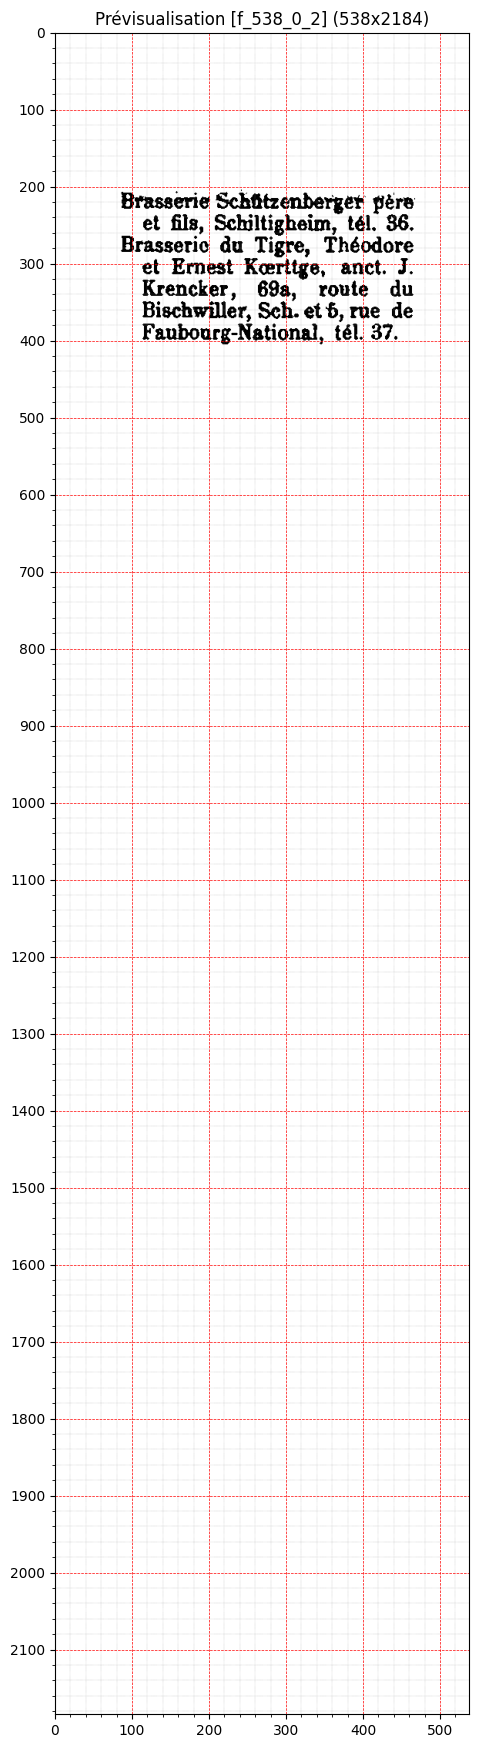

```arm Kan,’ 13, rue 'dübourg-National. Kttlinger Bernard, 58, boulvd. : Clemenceau  
Brasseurs. (Bierbrauereien.) Brasserie de l'Espérance, Sch.,  
…  
Freysz Ch., 37-39, Grand’rue  
“Fréysz Jules, 52, route des Romains, Kh.  
Grandes Brasseries Alsaciennes, S. a. Schiitigheim Strasbourg, ancienne Maison Ebrhard Frères  
Gruber & Cie, 91, route des Romains, Kh.  
Brasserie de Cronenbourg, S. p. A., anct. F. G. Hatt, 68, route d'Oberhausbergen, Crue  
Brasserie du Pêcheur, Schiltig‚heim  
Prienr Ch., 68, route des Bo.mmains, Kh.  
Brasserie de la Perle, P. Haeoeffel,  
Schiltigheim  
Brasserie L. Schneider, 102,  
. route d. Romains, Kh,  
Brasserie Schfitzenberget père et fils, Schiltigheim  
Brasseric du Tigre, Théodore et Ernest Kaerttge, anct. J. Krencker, 69a, route du Bischwiller, Sch. et 6, rue de Faubourg-National
```

In [ ]:
brasseurs = archiveAdresses.subset(imgs=["f_538_0"])
brasseurs.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
brasseurs.split_only(image_name="f_538_0", template="240|405|400|460")
brasseurs.remove("f_538_0_0").remove("f_538_0_3")
brasseurs.get("f_538_0_1").rotate(0.3).mask(top=180, bottom=2144-1460).add_borders(left=70, right=70)
brasseurs.get("f_538_0_2").mask(top=185, bottom=2144-390, left=10).denoise(kernel=1, iterations=1).add_borders(left=70, right=70)

brasseurs.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = brasseurs.get_ocr_text()

In [ ]:
entrepots_marchands_bieres = archiveAdresses.subset(imgs=["f_524_1", "f_525_1"])
entrepots_marchands_bieres.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
entrepots_marchands_bieres.get("f_524_1").mask(right=1504-1320, top=1535, left=920, bottom=2144-1920)
entrepots_marchands_bieres.get("f_525_1").mask(right=1504-520, top=680, left=120, bottom=2144-1500)

entrepots_marchands_bieres.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = entrepots_marchands_bieres.get_ocr_text()

```Burkhardt Emile, 35, rue des Abeilles, B, Denni Henri, 10,rued.Dornach,Nd. -Ducros Alb., 55, rue du Fossédes-Tanneurs.          | Ebner Prosper, anct. F. Fuchs, 16, rue Ste-Hélène.  
Fleig Frederic, 16-18, rue Ste Hélène, tét, 464.  
Forrer Charles, 1, place du Foin  
Frietsch François, 1, rue Parailèle, Nh.  
Fuchs F., 8, rue des Cordonniers,  
Ganzenmuller Chröt., 18, chem. de la Scierie, Nd.  
Gass Jos. 4, rue St-Aloise, Nd.  
Guhmann Charles, 32, rue dé de la Kurvau, Nd.  
Klein Paul, 19. rue Déserte  
Kuhn Vietor, 49, rue de la Course  
Nufer Othon, 26, rue Saint Aloise, Nd.  
Reinhardt Armand, 10, rue de Dornach, Nd.  
Reinink Jean, 23, rue Saint Aloise, Nd.  
Reiter Alb., 84, av. des Vosges.  
Rist Michel, 1, place Sainte Madeleine  
Rubard Albert, 6, rue de Barr  
Schneider Jean, 73, rue de la Ziegelau, Nd.  
Sidel Joseph, 7, rue du Sel, B.  
Weill Etgène, Vve, 8, rue Fritz.  
Wenzet Nic. 25, rue du Neufeld, Nd.  
Wiesler True, 26, rue St-Aloise, Nd.
```

In [ ]:
cafes_brasseries = archiveAdresses.subset(imgs=["f_545_1", "f_546_0", "f_546_1", "f_547_1", "f_548_0", "f_548_1", "f_550_0"])
cafes_brasseries.sharpen().binarize().erode(kernel=1).dilate(kernel=2)

cafes_brasseries.get("f_545_1").mask(top=1600, left=940, bottom=2144-1960, right=1496-1340) #ok
cafes_brasseries.get("f_546_0").mask(top=160, left=200, bottom=2144-2000, right=1496-1420) #split
cafes_brasseries.get("f_546_1").mask(top=180, left=100, bottom=2144-1960, right=1496-1340) #split
cafes_brasseries.get("f_547_1").rotate(0.4).mask(top=200, left=120, bottom=2144-1990, right=1496-1340)
cafes_brasseries.get("f_548_0").mask(top=200, left=200, bottom=2144-560, right=1496-1440)
cafes_brasseries.get("f_548_1").rotate(1.3).mask(top=220, left=120, bottom=2144-1990, right=1496-1360)
cafes_brasseries.get("f_550_0").mask(top=200, left=200, bottom=2144-1500, right=1496-1420)

cafes_brasseries.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = cafes_brasseries.get_ocr_text()

```(OCRANKWITSCRATEEN) :  
Adam Alph. (au Jard. Schmidt), 1, chemin des Forgerons, Nd.  
Adé Jean, 67, rue St. Aloyse, Nd.  
Ajoux Eug. (Chaîne d'Or), 134. Grand'rue, tél. 3976.  
Albecker Jos, 42, rue des Jardiniers, Rb:  
Albecker Philippe, 12, rue Prin-  
‘ cipale, Rb.  
Altheimer Alph., 1, rue d. Cygne.  
Ambos Louis, 20, rue St-Marc.  
Andlauer Robert, 2, avenue Ste-Marie, Nd. Armbrust Theod. (au Moulin Rouge), 55, Grand'rue. ” Arnold Charles (au Bois Vert), 7, x. de Woerth, Rb., tél 3488. Baas E. (au Rendez-vous d.Artilleurs), 177, rue d. Polygone, Nd. Bsr Jos., 33, boulev. de Nancy. Bangratz André (à l’Espérance), 2, Illweg, Rb. "Barthel Jos. (& la Ville de Brumath),34, ruede Brumatb, Sch. Bartholus Henri, 6,rue St-Nicolas. Bastian Aloyse (salle de la République), 25,routed. Colmar, Nd., tel. 4826. Bauer Aug,, 39a, Grasweg, Krue Bauer Charles, 43, Finkwiller: ‘Baumgaertner Madeleine, 23, route des Romains, Kh. Beck, Alph. (Jean & Jacques), 4, rue des Paiens. Beck A., 44, rue du Polygone, Nd. Beck Emile, 4, rue de la Fonderie. Beck Emile, 8, r, d. Schiltigheim. ‚Becker Henri, 72, Grande’rue. Beitz Eug., 8, rue des Böuchers. Berg, née Eschbach Carot.,.95, route d’Altenheim, Nd. Bernbach Jos. (à la Rotonde), 22,ruede Mittelhausbergen, Krue Berring Isid., 1,.rue d. Balayeurs, Beuttler Marie, 14, rue de la Krutenau. Biehler ae (à la Place de E   enau), 1, place d Haguenau A AEUenan, Bieschy Jos.,11, rued. Rhin, Nd, Biester Gaston, 1, Musau, Nd. Bieth Th., 11, rue des Orphelins, Bilz Ch. 106, rue du Polygone, Nd. Bindei Ant. 60, rue du Faubourg de Saverne. Biry Emile, 18,rued. Schiltigheim. Bisseÿ Albert, 11, rue Thomann. Bollinger Michel (àla Mouche), 97, route de Colmar, Nd. Bollinger Paul, 16, rue Adolphe Seyboth. Bebiy E., 134,rued.Romains, Kh. Bootz Albert (Coq Blanc), 11, rued. Fbg. de Piertes, tél. 4242, Bordes Madeleine, 24, rue du Jeu-des-Enfants, tél, 1914. Bosshardt Ernest, 15, quai des Bateliers. Bottemer Jos., 23, rue d.1, Course. Boudgust Emile, 50, rue de TUnterelsau, M, Y. Box Charles, 42, Boulevard Clemenceau (voir annonce).  
Brassel Victor, 28, chemin de de l'Unterelsau, M. V.  
Brechenmacher Louise, 121, rue de Schirmeck, M. V., tél. 1879.  
Bret Joséphine 5, r: d. Orphelins.  
Bringolf Ch. 9, quai d. Pêcheuts.  
Briollet Eugène, 3, rue du quertier St-Nicolas.  
Brohammer Charles, 20,chemin Haut, Crue  
Bronner A., 76, rued. Colmar, Nd.  
Brosius Eugène, 8, route de la Fédération, Nd.  
Bruederle G. (4 la Fraternité) 89, rue du Vieil-Hôpital. Budy Marie, 7, Bld. de Lyon. Burger Emile, Vve (à la Liberté), 9Sbis, rue d. 1 Wancenau, Rb, Burger Jos. (à la Charrue), 60, rue du Fbg.-National, tél. 1690. Busch Charles, 28, rue d. Faubourg de Pierres, tél, 4256. Chapelle Eugène (au Grenadier),  
112, Grand’rue. Chapelle Louis (au Blaireau), 80, quai des Bateliers. Chiguard Maurice, 9, rue Vauban. Clody Georges, 3, place St-Nicolas. Couche Eugène, 189, route. du Polygone. Conrad G., 7, imp. St-Nicolas. Cron G.,1j, rued’Ältenheim, Nh. Däschler Guillaume (Ala Rose), 8, rue du Chaudron. Dentel Jas., 56, rue du Jeudes-Enfants, tél. 360. Deuchler Jacques (à la Pomme d'or), 1, rue Jeanne-d’Arc, Rp. Diebold, Auguste, 5, boulev. du President Wilson. Diebolt Eug., 14,rue d’Erstein, Nd. Diestel Jos.,36,bd.Clemenceau.. Diethelm A., 13, Fbg.d.Saverne. Dietz Jacques (A la Concorde), 81, rue d. Serruriers, tél. 259. Diss Auguste, 43, chemin des Hirondelles, Nh. Diss Jos., 18, rue de la Grange. Disser Eugène, 60, route du Polygone, Nd. Doberer Jean, 58,rue St-Aloise,Nd. Doberer Jacques, 176, route du Polygone, Nd. Doeaebler A. (au Jardin Hämmerle) 25, rue de l'Extenwaerth, Nd. Dorigo Laurue (au Bon Pasteur), 11, rue Principale, Rb. Dubler Léodegar, 28, rue de l'Ecrevisse. Durelieq Jul,,8,quaid.P&cheurs. Dusch Daniel (& la Belle-Vue), 1, chemin Gaebweg.Rb.,t 61.8018.  
Eber, née Eschbach Célestine, . 62, route d’Altenheim, Nd.  
Ebersold André, 3d, rue dé la Coopérative, Nd.  
Ebner Alb., 12b, rue du Rhin, Nd.  
Eckert Eug., 12, rue Hannong.  
Ehregardt Salomé, 6, rue Ste Hélène.  
Ehret E. (à l’Agenau), 52, rue d’Altenheim, Nd.  
Ehret Jos,, 14, chemin du Heyritz, Nd.  
Ebrhard Gust., 58, rue du Fhg. de Pierres.  
Eissenbeis, née Fischer Marie, 58a, rue St-Urbain, Nd.  
Elles Alph.,26,rue dela Fonderie.  
Engel Gustave, 1d, rue d. Vieux March&-aux-Poissons.  
|Erb Ernest, 40, rue. du Fau-  
bourg National. Erb Fred.,9, rue des Tonneliers. Ernwein Alfrue (à l'Ange d'Or), 9, rue dés Orphelins. Ertz Michel, 99, route de Mittelkausbergen, Crue Fahrer Eugène (au Pigeon), 28, rue des Tonneliers, tél. 4314. Falk Madel, 2, rue St-Aloise, Na. Fehr Jos. (à la Ville de Benfeld), Felden Guillaume, 18, chemin de la Montagne-Verte, M. V. Félix Albert (au Coq rouge), 42, Grand’rue. Fingado Gustave, 6, petite rue d'Austerlitz, tél 4282. Fix Aloyse (au Carpe),68a, route d’Altenheim, Nd. Forler Charles (au Croix Rouge), 7, route d’Altenheim, Nd, Forrer Guill., 22,rue de Zurich. Frank Alfred, 30, ruedu Chemin de fer, Kh. Frantz Emile, 95, Schirmeck, M.V. Frey Georges, 1, rued.l'Ecrevisse. Fuchs Albert (au Cygne), 29, rue de la Wancenau, Rb. Fuéhs Chrétien, 2, place des Moulins Zorn.          , Fucks Henri, 16, rue du Bain Finkwillerue                . Fuchs Joseph, 23, rue de l’Ail et 13, rue des Tonnéliers. Fuchs M., 211, route de Schirmeck, M V. Fuhrmann Philippe, 12, rue des Soeurs et 18, rue de la Croix.. Galle Frue, 56, bld. Clemenceau. Gass Aloyse (à la Petite Bourse), 12, rue des Bouchers.  
route de  
Gassner Lueien, 1,rue du Magasin-à-Fourrages.  
Gattang J.,1,rue d. Dambach, Nd.  
Geny Joseph (au Cerf d'Or), 41, rue Principale, Rb.  
Geutner Emile (à la Ville d'Anvers), 16, rue de Verdun. Gerner Cam. {au Vieux Tableau),  
‘ À, rue de Zurich.  
Gersbach E.,46, av. des Vosges.  
Geyer Emile (au Gerf), 9, rue de Haguenau.  
Giess Fréd., 35, rue d. Marais-Vert.  
Gintz Antoine, 48,ruede Zurich.  
Gisselbrecht Jean, 12, rue du Fossé Riepberg, 12.  
Glatt, née Hahn Salomé (au Cor de Chasse), 9, rue de l'Abreuvoirue  
Glausinger A.,2, place St-Thomas.  
Goepp Gust. 6, rue de la Lanterne, tél. 922.  
Gesetz Alb., 40, rue St-Erhard, Nd. Goetz Emile, 36, rue du Faubourg-National, tél. 3600. Goetz Joseph (au Capucin), 87,  
route de Colmar, Nd.  
Grayer Alphonse, 38, route d’Altenheim, Nh.  
Gretzer Aug. (au G, Lafayette), 4, rüe d Altenheim, Nä. Griesbach Jean, 59, rue de la  
Ziegelau, Nd.  
Grimme Ch., 2, rued. Glacieres.  
Groll Ch.,7, rued.1. Wancenau,Rb.  
Gross G., 4-6, rue d. Tonneliers.  
Guionneau René, 27, rue Vauban.  
Haag Joseph, 1, rue Marlenheim, tel. 1590.  
Haas Emile, 8, rue d. Liöpvre, Nd.  
Haas Jean, 69, rue du Fau-  
_ bourg de Pierres, tél. 3052.  
Haas Michel (au Raisin), 29, rue de Mittelhausbergen, Krue  
Hamann Edouard, 47, route d’Altenheiin, Nh.  
Hamm Jos. (au petit P&cheur), ‚18, quai des Bateliers.  
Hammecher Auguste, rue du Port-du-Rliin, Na.  
Hantz Emile, 7, quai de Paris,  
Hassler Jacques (au Poilu), 12,rue d. Vieux-Marché-aux-Grains,  
Hausser Joséphine, 17, quai Kléber,  
Heinkelé, Jul, 2, rue du Brochet. Heintzelmann Charles, 115, route des Romains, Kh. Heissler Charles (aux Vosges),  
77, rue des Vosges.  
Heitz Auguste, 16a, rue de la  
Wancenau, Rb.  
Heitz Joseph, 35, chemin des.  
Hirondelles, Nh.        . Heitz Eugène (aux Trois-Rois), 20, rue d’Austerlitz. Heitz.Phil., 48, a la Musau, Nd. Heitz Val., 10, rue du Sanglierue Herbrich Mathieu (au Poilud. 1, Marne), 53, rue du Faubourg National, tel. 999.Herlitz E., 20, rue d. 1. Tour, Kh. Herrmann Antoine, 26, rue d'Orue Herrmann Jaeq.,2, rue dela Räpe. Hertenberger Paul, 98, route de Colmar, Nd. Hetzel Charles (Cannet d'Or), 24, quai 'St-Nicolas. Hetzel Fröd., rue du Fossé-des-  
Treize.              | Hilbold Charles, 11, quai du  
Finkwiller, Hincker, J. Vve., 18, rue du Faubourg de Pierres. Hirle Emile, 57, Grand'rue. Hirsch Lucien (aux Deux-Clefs), 40, rue Principale, Rb. Hoh, nee Dietz Emilie, 152, route de Brumath.  
Hozrdt Ch.,10,rued.1.Kurvau, Nd. Hoff Th 6od. (au Tonneau d'Or), 2, rue du Tribunal, Sch. Hoffbeck Jos., 7-9, rue du Maire  
Küss, tél. 1464.  
Holweg Jacques (au Kléber), 80, rue de la Kruienau. Hommel Etienne(au Soleil d'Or),  
42b, rue de la Wancenau, Rb. Hommel J.-Bpt. (à la Belle-Vue), 143, route de Colmar, Hommel Felix,11,rued.1.Douane. Hornecker Auguste (au Cheval Noir) 17, rue Kempf, .Bb. Huber A., 165, rued.Romains,Kh. Huck Emile (à la Belle-Vue), 148, route de Colmar, Nd., 161.143. Huck Eugène (à l'Orient), 9, petite rue de la Course, Huetiner Charles (aux Trois Epis), 3, rue Melanie, Rb. Hug Alphonse (au Soleil), 2, rue du Cygne, Nd.. Immig Charles, 175, route du Poiygone, Nd  
Irrmann. M. 15, rue dés Moulins.  
Jacht Armand (au Chasseur), 77, av. de la Forêt-Noire.  
Jacob Ant., 12, pi. d'Austerlitz,  
Jacobörger Marie, 15, rue Ste Madeleine.  
Jahraus Guill., 96,rued. Bâle, Nd.  
Jerger Ch., 23, rue de l'Ecole, Nd.  
Jesser P., 18, rue d. l'Abreuvoiirue  
“Jest Auguste (au Boeuf), 22, rue  
du Territoire, N.  
Jest Eugène, 3, Burnelweg, N.  
Joggerst Auguste (au Camionneur), 76, rue du Faubourg de Saverne.  
Jost 6. (au Grand Kléber), 47-49, rue des Grandes-Arcades {voir annonce).           ..  
Kammerer Aloise (au Rocher de Sapin), 56, rue St-Fiacre, Rb,  
-Kamper Emile (à la Maison  
Ronge), 72, rue Principale, Rb. Kauffer Jos., (au Cheval Blanc), 47, rue Himmerich, Rh. Kauss Alfred (au Pot de Fleurs), 133, rue Schott, Rb. Kellér Alfred, 84, rue d. l'Uñterelsau, M. V. Keller Auguste (au Cog Blanc), 89, rue Principale, Rb, Keller Caroline, Vre, 9, rue de l’Abreuvoirue Kempf W.(& l’Aigle d'Or), 57, rue 4.1. Wancenan, Rb;, tel. 2154. Kettner Emile, 8, rue d. Dentelles. Kiefer Alfred (à la Loutre), 169,route de Schirmeck, M.V. (voir annonce sur pap. coul.) Kieffer Charl., 9, rue d. Orphelins. Kieffer Michel, 1, quai.St-Jean. Kientz. Berthe (& la Caisse d’Epargne) 1, rue d. Serruriers. Kientz Camille (à la Licorne), 12, rue du Territoire, B. Kinzle, née Naegeli Marie (à la Cloche), 12, rue des Soeurs.  
Nd. | Klein Charl., 16, place St-Etienne.  
Kluber Charles, 72, Grand’rue. Klughertz Alphonse (Jardin Christian), 9, rue Principale,Rb;  
"Knecht Georges (& 1’Ours Blane),  
8, rue du Fossé-des-Tanneurs et 28, place Kleberue  
‘Knochel Charles, 1, r, d'Andiau.  
Knoll Emile, 1, rue St-Guillaume,  
Kaeoebel G., 74, rue d la Forét-Noire.  
Koebel L., 5, rüe des Aveugles,  
Koebhler, née Kappler Barbe, 5, rue Adolphe-Wurtz.  
Koenig Jean, 28, route d’Allenheim, Nh.  
Koenig Joseph, 44, alle David Goldschmidt, Nh.  
Kornig Louis (au Petit Rhin), 17, route du Rhin, tél. 4481. Koffel Charl. (au Boeuf Blanc),  
28, rue d. Pêcheurs, tél. 2944 {voir annonce).         x Korrmann Alfrue,4,rue Tiergarten. Kohser Charles, 28, rue du  
Bain-aux-Plantes.  
Korn Antoine, 37, rue du 22 Novembre, tél. 2178. Kraebn Pierre, 3, rue d. Planches. Kraemer Jacq. (aux 3 Cigognes), 139, route du Polygone, Nd. Kremer J., 59, rue St-Aloyse, Nd. Kranker J., 15, petite rue de  
la Course. Krenker F. (äl’Aigled’Or),88,rue  
du Polygone, Nd., tél. 2096.  
Krencker J., 5, rue du Faubourg National.  
Kretz Fernand, 26, rue de la Fonderie.  
Kuehnlé Jean, %5,rued.Orphelins. Kuhn Jacques, Vve, 53, rue.  
St-Aloyse, Nd.  
Kuehnle Etienne, 145, route d’Oberhausbergen, Crue  
Kuntz Jean, Vve, 1a, Contades,  
Kuntz Joseph (& la Ville de Verdun), 10, rue d. Molsheim,  
Kutteroff Charles, 10, rue Ste Marguerite.  
Lantz Frederic (au Tilleul), 2, rué Principale, Rb., tél. 4219.  
Lauck Georges (à la Fleur), 335, route de Colmar, Nd.  
Lauth Anne, 4, rue d. l’Argile.  
Leibold Ernest, 6, rue du Maire Küss, t 6l. 3653.  
Lehmann Gust. (à la Nouvelle Gare), 74, rue d. Lazaret, Nd.  
Leopold J., 32, rue de Moisheim.  
Lieber Paul (au Buffalo-Bill), 12, rue de Sébastopo L  
Lienhard Aloyse, 44, route d’Oberhausbergen, Crue  
Lienhard Thiébaut, 4, rüe de l'Hôpital.         .  
Linder Nicolas, 46, rue du Faubourg de Pierres.  
Liner Ant., 19, rue d. Bouchers.  
Littel Antoine, 41, rue d. Vieux Marthé-aux-Vins, tél. 7648.  
Loenhard, née Jost Mathilde {à l'Oiseau), 13, place Broglie.  
Lohnert E: (au.Bäckehiesel), 77, allée dela Robertsau, té]. 283,  
Lutz Emile, 25, rue du Fossédes-Treize,          4  
Lutz Salome, Vve,, 117, route des Romains, Kh.  
Lux Alfred, 3, Orangerie, Maison Alsacienne.  
Lux Hippolyte, 6, place des Etudiants, tél. 230.  
Lux E., Vve., 20, rue du Faubourg de Saverne,  
Maag Ph., 60, bld. (Clemenceau.  
Maier J., 8; rue Adolph-Seyboth.  
Mann Philippe, 10, rue de la Charmille, Kh.  
Mantz Adolphe, 15, rue des Pierres, B., tél. 1014.     .  
Marfing J.,29,rue d. Lazaret, Nd.  
'Maschino Aug, 5, route du  
Rhin, Na, tél. 2363.  
Matter Henriette, 25, rue du Bain-aux-Plantes,  
Matter Nic., 15,rue d.Marais-Vert.  
Matz Guillaumefau Lion Rouge), 29, rue des Juifs.  
Matz Charles (à la Carpe d'Or), 13, rue de Schiltigheim.  
Maurer Aug.,12, rue.St-Nicolas.  
May Frue,Vve, 11,placed’Austerlitz.  
Mayer Jean, 8, rue du Faubourg National.  
Mehl-Meyr J. (à la Belle-Vue), 8-4, quai St-Jean, tél. 1638.  
Mehn Auguste, 52, route des Romains, Kh., tél. 349.  
Meinzer Emile (aux braves Poilus), 18, ». d. Jeu-des-Enfants.  
Meistertzheim Joseph, 38, quai des Bateliers.  
Mentel Ch., (aux Trois-Epis), 7, chemin dela Montagne-Verte, M.V. tél. 1109.  
Meng Eugène, 41, Musau, Nd.  
Meurer Adolphe, 11,rue Thomann.  
Meyer Aug. 9, rue des Moulins.  
Meyer Charles, 49, Grand’rue,  
Meyer E. (au petit P£cheur), route du Polygone, Nd.  
Meyer Emile, {au Marche de Poissons), place des Cochonsde-Lait.  
Meyer Félix (au Lièvre), 4, rue de Thann, Nd.  
Meyer Jean (au Hirzl), 8, rue du Faubourg National.  
Meyer Joseph, 155, route du Polygone, Nd.  
Meyer, née Senger Marie, 4, rue de Thann, Nd.  
Meyer Victor (à la Redoute), 171, rue de la Carpe-Haute, Rb.  
Mohr Pierre, 2a,rue d. Colmar, Nd.  
Moreau Laurent, 73, route de. Colmar, Nd. tél. 2664.  
Moschenroos Louis, 6, rue Kirschleger, Nd.  
Moser E. (au Renard-Prêchant), 14, rue de Zurich.  
Mosser Joseph, 310, route de Schirmeck, M.Y.  
Mosser L., 46, rue St-Fiacre, Rb.  
Muller Emile, place d'Austerlitz.  
Muller Em. (à la Petite France),  
“À, rue du Puits.  
Muller Gust. (à la Tête Noire), 19, rue Principale, B  
Müller 4, 93, rued. Romains, Kh.  
Muller Pierre, 1, rue Kirstein, tél. 4974.  
Munch Jacq, 3, place Ste-Aurélie.  
Mussel Caroline, Vve., 17, rue Neuve, Crue      .  
Naas Chrétien (au Cerf), 11, rue Bischwiller, Sch.  
Naegelé Charles, 13, chemin de. la Montage-Verte, M.V.  
Naes Marie, Vve, 42, boulevard Clemenceau.  
Nessinger Fritz, 77, av. de [a Foröt-Noire.  
Niedermeyer Ch. (au Tilleul), 79, rue du Territoire, H. Nigris Charles, 59, rue de Zurich. Nuss Louis (à l'Ill), 14, rue de  
Molsheim.  
Obrecht Adolphe, 10-11, place de la Gare, tél. 2045.  
Offland René, 26, chemin de la Ganzau, Nh.  
Orth Michel (au Grand Turc), . route des Romaiäs, Kh. (voir annonce).  
Ottinger Th., Vve. (à l'Ancienne Monnaie), 2, rue Escarpée.  
Palais de Fêtes, 5, rue Sellénick.  
Panloy Adrienne, 20, place du Marché-Gayot.  
Pelletier Joséphine, 2, rue de l'Hôpital, Nd.  
Pesch Alph.,9, rue d. Chandelles.  
Peter Jos. (au Chemin d. Dames), 7-9,rue Gustave-Doré, tél. 2634.  
Peter Justin (Folies-Bergère), 116, Grand'rue.  
Pfeiffer Georg.,8,rued.1.Tour,Kh.  
Pfindel Charles (A l’Esperance), 8, rue du Barrage, Sch,  
Pfister Auguste, 138, route des Romains, Kh.  
Pflughaupt Joséphine (à l'Ancre d'Or), 107, route de Mittel-  
hausbergen, Crue  
Pflumio G., 5b; quai Mullenheim.  
Pfrimmer Jacques, 41, boulev.. National.  
Brasserie-Restaurant PITON  
Maison universellement connue et renommée par sa bière Fondée en 1863.  
16, Yisax-Marché-aur-Crains, til. 344,  
Plautz O. (aux Trois-Cigognes), 79, rue du Territoire, B, Prohamer Charles, 47, rue du  
Fossé-des-Tanneurs.  
Raab Jacques, 10, rue, Gloxin, | Reixel Jos  (à la. Mauresse), Rebmeister, Vve. (& l’Abattoir,| rue du Vieux-Marché-aux20, rue de la Glaciöre, Sch.| Poissons, tél. 680 (voir an Rébstein Thérèse, 7, rue Gus-| nonce sur pap. coul.). tave-Doré, tél 2634.      Remertz W. x chemin des Rebstock Marie, 24, rı          ergerans, 0, Chemin. de-fer, Eh rue du Rettig Georges, 12, avenue de 0.    .    ,      la Marseillaise. Reeg Charles (au Lion d'Or), | Richter Aloyse, 17, rue des 37, tue Principale, Rb.       Jardiniers, Rb. Reibel Alfred, 46, route d'Ober| Richert Georges, 4, boulev. du hausbergen, Crue              Président Wilson.  
Rieb Geoffroi, (à l'Aigle d'Or), 53, rue d. Fauhourg de Pierres.  
Riebel Louise, Vve. (aux Quatre-  
. Vents), 14, rue de la Carpe Haute, Rb.  
Rieblé Emile, 18, rue d. Bateliérs,  
Riedmann Jos., 31, av.d.Vosges.  
LRieffel René, 24, rue du Fossé-  
des-Tanneurs, iél. 3358,  
Riegel Jos. (aux Deux-Cognees), 82, rue du Fauh. National.  
Riha Martin, 48, rue du Vieux Marché-aux-Poissons, tél. 3638.  
Riehl Albert, 1,rue d.Marlenheim.  
Riehl Georges (au Cheval blanc), 26, rue Principale, Sch.  
Riehle Marie, 145, route de Schirmeck, M.V.  
Riehm Dan.,29,rued.1.Krutenau.  
Rinckel Valentin, 66, ronte de Calmar, N.  
Risch Laurue (ia Ville de Thann), 13, rue du Marais-Vert.  
Riss Ch. (au Poilu de France), 11, rue de la Finkmatt.  
Roegner Ernest, 7, r, d.1’Eglise.  
Roth Emilie, Vve. (à l'Espérance), 22, rue des. Veaux.  
Roth Gustave (à l'Ecluse du Rhin), 12, quai Jacoutot.  
Roth Henri, 82, route du Polygone, Nd.  
Ruch Jacques (Cafe de la Nouvelle Poste), 12, rue du Parchemin (voir annonce sur pap.coul.).  
Schaal Benjamin,  al,  route de Colmar, Nd., tél  
Schadt Alfred  
à l'Aigle d'orue) 27, rue du Faub.-National.  
Schadt Jacques, 36, rue du Jeu-des-Enfants.  
Schaefer Eugène (aux Trois Roses), rue de la Demi-Lune,  
Schalck Joseph (à l'Ancienne Gare}, 3-6, quai Kléber, tél.  
Schall Jacques (au Soleil), 46, rue de la Wancenau, Rb.  
Schang Eugène (aux Quatres Saisons), 39, av. d. Vosges.  
Schanté Louis (à la Couronne), 52, rue du Faub. de Pierres.  
Scheer Jacques (au Singe Bleu), 31, rue Oberlin.  
Schell Ant, rue de Metzeral,Nd.  
Scherrer Ch.,10, rued. Molsheim.  
Schildknecht Elise, 26, rue des Ormes, Crue  
Schimberlé Georges, 164, route des Romains, Kh.  
Schladenhaufen Georges, (aux ra) 18, rue Princi-  
sdlear J., 19, rue d. L Krutenau.  
Schleh Chrét., 2, rue d. Maroquin.  
Schleifer Jacques, 11, rue de l'Abreuvoirue  
Schlickling Jean (à l'Aigled’Or), 27, rue du Faub. National.  
Schlaegel Jos., 2, rue des Poules.  
Schlosser Fred,, 17, rue du 22 Novembre.  
Schmidt Jean, 6, place St-Nicolas.  
Schmitt Alb., 13, rue des Soeurs. Schmitt Ant., 18, route du Polygone, nd. Schmitt Fred. (au Port de Kehl), 95, avenue de la Forät-Noire, 2529.  
Schmitt Jean (à la Licorne), 7, rue Kuhn.  
Schmitt Léon, 24, route d'Altenheim, Nh.  
Schmitt Marie (à la Belle-Vue), 4, rue d’Oberhausbergen, Cr  
Schmitt Nie. (au Cerf), 40, rue du Sel B  
Schneider Ba.  (au Lion d’Or), 43, rue du Territoire, B.  
Schneider Ch, 7, route des Romains, Kb.  
Schneider Em. (à la Pomme  
d'Or), 7, rue des Pompiers, Sch.  
Schneiderlin Rob. (au Cygne), 14, rue Traversière, Nd.  
Scheettel Ch., 52, rue du Jeudes-Enfants.  
Scholl Jean (au Cerf Blanc) 24, rue Thiergarten.  
Schott Jos., Vve (à l’Ancre), 109, route du Polygone, Nd.  
Schütz Em, 46, rue du Jeudes-Enfants.  
Schuhmacher, seurs, 5, rue du Chevalier Robert, Rb. Schwab Ch,, 15, rue des Francs-  
Bourgeois. ‚ | Schwaller Ehil. (au Franctireur), 4, Grand’rue. "| Schwing Jos. (au Bateau), 43, rue de ia Robertsau, B. Schwaebel Henri, 26, rue de ki Charmille, Kh.  
Schwaerer Pauline, 1, rue de l'Aimant.  
Siefert Eug., 62a, rue du Lazaret, Nd.  
Sielfert” Aib., 65, rue de Zurich.  
Sieffert Aloyse, 24, boulev. du Président Wilson.  
Sietfert Ant:, 38, rue des Juifs.  
Siess Jean, 1, pl d’Austerlitz.  
Simon Emile (au Rendez-vous des Poilus), 5, rue du Faubourg de Saverne.  
Simon Jos. 24, rue St-Louis.  
Sittler Aloyse, 12, rue de S 6bastopol.  
Sossier Aloyse, 52, route d’AItenheim, Nh.  
Spack Michel (au Grenadien), 32, rue de la Gare, Sch.  
Spehner Eug. (au Lion d'Or), 19, quai des Bateliers.    ‘  
Stadtler Aloyse,  
Speich Aug., 306, route de Schirmeck, M.V. Speich Vict. (au Contades), 5, rue du Contades. Spitzer Emile, 53, rue du Fossé des Tanneurs. 10, Vieux-  
Marchö-aux-Poissons, tel.  
Stegner Carol. (Alcazar), 43, route du Polygone, Nd.  
T. | Stehberger Madel., 65, rue. de  
Schlestadt, Nd.  
Stempffer Albert.,  16, rue du Tivoli.  
Stengel Florue (& la Poste), 31, route d’Oberkausbergen, Crue  
Stock Chrét., 23, boul. de la Victoire.  
Steeckl& Ch. (au Cheval noir), 37, rue Principale, Sch.  
Stoecklin Ed., 132, route de Mittelhausbergen, Crue  
Stoehr Ant,, 1b, route d’Altenheim, Nh.  
Blpenar Georges (au Rhin),  
rue Principale, Sch.  
Stoll Ch., 21, rue d’Altdorf, M.V.  
Stoll Chrét,  28,  rue du Sel, B.  
Stoll Jos.  
la Coupe d'Or), 28, rue La Broque.  
Stoll Joséph. (au Kléber), 30, rue de la Krutenau.  
Strasser Pierre, 2, rue du Marché, B.  
Strehlen Henri (& la Poste), 23, route du Polygone.  
Striebel Michel, 2, quai de la Bruche.  
Stroh. Cath., 1, rue Ste-Hélène.  
Stumpf Adèle, 5, place de la Grande-Boucherie.  
Tauffreund Jul., 4, place Clément.  
Thimmé Léonie, née Brenner, 11, rue des Orphelins.  
Thomas Ch., Vve, 56, rue de la Wancenau, Rb.  
Trescher Henri, 5, rue du Puits.  
Tretsch Victor, 108 rue Prineipale, Rb., t&l. 8235.  
Ulmerue Aloyse, 19, rue de la Ziegelau, Nd.  
Ulrich Elise, 6, route d'Oberhausbergen, Crue  
Ulrich Eug., 8, rue Brûlée.  
Untereiner Jos.  (au Bas-Rhin), 122, route de Mittelhaushergen,   Crue  
Uiban Michel, 6, rue des Glacières.  
Vanssons Alfred, 17, chemin du Heyritz, Nd.  
Viollaz Jos., 32, boulev. Clemenceau.         |  
Viehe Jacques, 84, rue de la Ziegelau.  
Vix Joseph., 68a, route d'Alten-  
heim, Nh.  
Vogel Phil. (à la Gare), 126, route. de Colmar, Nd.  
Vogt Ch. (à la Bague d'Or), 8, rue de Bischwiller, Sch.  
Vonau Marie, Vve, 20, rue de Rhinau, Nd.  
Weaegell Alfred (au Chêne vert), 4, place de l'Hôpital.      |  
Wagner Léon, 29, route des| Romains, Kh.             |  
Wagner Léon, 23, rue de l'Arc| en-ciel.  
Wagner Louis (au Charriot à Foin), 18, rue de l'Abreuvoir,  
Wagner Paul (Lafayette), 16, rue Oberlin, tél. 1932.  
Walch Eug., 24, rue des Poules.  
Walisser Franç., 10a, route du | Rhin, Nd.                |  
Walter André, 56, boul. Cle-| menceau,                ,  
Walther Georges, 5, rue du| Docteur François, Rb.     |  
Wassner Anne, 1, route de Colmar, Nd.  
Waydelich Frederic, 48, rue ‚Prineipale, Rb,  
Weber Albert, Vve, 16, rue du Chemin de fer, Kh.  
Weibel Eug., 5, Ponts-Couveris.  
Weil Ch. (à la Couronne), 188, . route de Colmar, Nd.  
Weill Georges, 68, route des Romains, Kh.  
Weissenburger Ant. 8-10, rue des Frères.  
Wetterwald Eug. (aux Alliées), 9, quai des Bateliers.      |  
Willer Aug., 14, rue du Bain-|  
Winter Georges, 7-9, rue de J'Arc-en-ciel.  
Woehl Martin, 46, Grand'rue.  
Wohlhueter Michel (à la Station), 118, rue de Colmar, Nd.  
Wurmser Louis, 5, route de Mittelhausbeigen, Crue  
Waurtz Gust., 6, quai Finkmatt.  
Wüst Aug. 3, ruedel'Abreuvoirue  
Zillhardt Guill., 79a, route de |  
la Wancenau, Rb  
Zimmer Michel (au Cygne), 25, |  
rue des Officiers, B.  
e) Cafés et Cafés-Bars  |  
(Cafés und Bars).  
Apprederisse Ignace, 22, rue  
u Döme.  
Barthel Emilie, 5, rue d'Austerlitz.  
Bertran (Oriental Bar), 16, rue de la Mésange.  
Boctz Jos. (Austerlitz), 1, rue d’Austerlitz,  
Boudgonst Marie, 6, rue du Vieux-Marché-aux-Poissons.  
Braun Carol. 14, rue de la Grange.  
Café du Commerce, 28-24, place Kléber, tél. 4821.  
Café de la République, 9, place Kleberue  
Denu Pierre, 7, rue des Juifs.  
Diemer Michel (à la Bonbonnière), 5, place du Marché Neuf.  
Durlach Rent & Marcel, 9, place Kléber et rue du 22 Novembre, tél. 665 (voir annonce).  
Fournaise J., 26, place Kléber, tél. 3071.  
Gaessler Joseph, 11, rue des Charpentiers (voir annonce).  
i Heitz Ch,  
8, place Broglie, tel. 1600.  
Heitz E., Grand Café de la Paix,  
44, rue de la Haute-Montée, tél. 325 et 394.  
Jacobs Henri (au Chat noir), .7, rue des Juifs.  
Kehres Jos. (au Rhin Français), 14, av. de la For&t-Noire, voir 3, rue Fischart.  
Keller Em. (au Matou Noir),  
63, rue du Faubourg de Pierres.        °  
Kempf Jules (Splendid Bar), 11, boulev. Taulerue  
Kempf Rene (Central), 6, rue du Vieux-Marché-aux-Poissons, tél. 1580.  
Kennel Michel (Café de la Liberté), 107, rte. de Mittelhausbergen, Crue     .  
Kern Jos., 14, rue du Vieux Marché-aux-Vins.  
Klein. Marie („Bacchus‘American-Bar), 1, rue des Soeurs {voir annonce).  
Lévy Lazare (Café Sans-Souci), 10, rue du Jeu-des-Enfants, tél. 183.  
Lienhard Eugène, (Express), 8, rue dé la Lanterne.  
Lösch Jean, (Wilson), ñ, rue St-Etienne, tél. 3115.  
Mayer Louise, 3, allée de là. Robertsan.  
Naturel François (au Naturel), Salle de Fleurs, 21, route de Colmar, Nd.
```

In [ ]:
cidreries = archiveAdresses.subset(imgs=["f_564_1"])
cidreries.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
cidreries.get("f_564_1").rotate(-0.4).mask(top=1710, left=945, right=1508-1340, bottom=2144-1960)

cidreries.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = cidreries.get_ocr_text()

```Le RS  
Frech Aug., 31, route d’Ober‘hausbergen,  Crue  
Joseph E.-W.,  16, 05 d. Fbg. de Pierres  
Zimpfer, ‘Grande, Cidrerie Alsacienme-Lorraine, E. Steiner suce., 8. quai des Pächeurs
```

In [ ]:
distilleries = archiveAdresses.subset(imgs=["f_587_0", "f_587_1"])
distilleries.sharpen().binarize().erode(kernel=1).dilate(kernel=2)

distilleries.get('f_587_0').rotate(1).mask(top=460 , left=1050, bottom=2144-1020, right=1504-1460)
distilleries.get('f_587_1').mask(top=650, left=110, right=1504-508, bottom=2144-1320)

distilleries.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = distilleries.get_ocr_text()

```Boussault-Fontaine, 49, rue du Faubourg National  
Grande Distillerie des Vosges directeur: Georges Vason 1, rue du Cygne  
Hammel & Lévy, 13, rue Ste Aurélie  
Kehren, J. & E, Gérard, 77, Grand’rue  
Kohfl, A. & E. & Cie, 6, rue de la Nuée-Bleue  
Kurz F. A., proprue A. Kurz, 15, rue d'Austerlitz  
Lange Ismar, 17, rue de Rosheim.  
Les suec. de E.L. Lab, 49, rue du Faubourg National  
Mayer M. J., Vve, suce, Distillerie du Bas-Rhin, 17, rue Principale, Sch  
Preuss Gustave, 14, rue Kageneck  
Scherrer Charles, 10, rue de Molsheim.       |  
Schmitter Philippe, 14, rue de Barr  
Stulz J., 11, rue de Haslach, M. V.  
Weil & Cie, 1, rue du Cygne
```

In [ ]:
houblons = archiveAdresses.subset(imgs=["f_616_0"])
houblons.sharpen().binarize().erode(kernel=1).dilate(kernel=2)
houblons.get('f_616_0').rotate(-0.4).mask(top=960, left=660, bottom=2144-1450, right=1504-1065)

houblons.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = houblons.get_ocr_text()

```Houblons (Marchands de). (Hopfenhandiungen.)  
Beltz & Auer, 26, boul. du Président Poincaré  
Bourlet Camille, 6, rue de la Cigogne  
Lajuzan & A, Horn,succ. de Weber-Schlumberger, 65, rue d. Polygone, Nd,  
Reiber Paul, 1, rue de Bischwiller, t&l. 1386.  
Schmid Paul, 12, rue Ehrmann  
Schrader & Schmitten, rue de la Balance au Foin
```

In [ ]:
malteries = archiveAdresses.subset(imgs=["f_637_0"])
malteries.sharpen().binarize().erode(kernel=1).dilate(kernel=2)

malteries.get('f_637_0').rotate(0.7)
malteries.split_only(image_name="f_637_0", template="1030|478")
malteries.get('f_637_0_0').rotate(0.5).mask(left=640, top=1800, right=5, bottom=144).add_borders(right=70)
malteries.get('f_637_0_1').mask(left=0, top=180, right=128, bottom=2192-350).add_borders(right=70)

malteries.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules) #Enjeux avec la règle des téléphones
data = malteries.get_ocr_text()

```(Mälzereien und Malzhandlg.)  
Hatt Frères, prop. Jean Hatt, 12, rue à. Glacières, tél. 61. Lorentz 0.,39,rue Principale,Sch.  
Rothenbach Paul, ‘4; pte. 1 de la Course, tél. 1978. Schrag & Fils, 3, rüe P.  
Janet; tél. 1589.
```

In [ ]:
tonneliers = archiveAdresses.subset(imgs=["f_690_0", "f_690_1"])
tonneliers.sharpen().binarize().erode(kernel=1).dilate(kernel=2)

tonneliers.get('f_690_0').mask(top=1100, left=1023, bottom=2144-1940, right=1488-1420)
tonneliers.get('f_690_1').rotate(-0.4).mask(top=160, left=130, bottom=2144-1310, right=1488-540)

tonneliers.ocr(language="fra+deu", config='--psm 1 --oem 1 -c preserve_interword_spaces=1').clean(rules=rules)
data = tonneliers.get_ocr_text()

```Tonneliers. (Küfermeisterue)  
Arnheiter O., 18, rue St-Marc.  
Batifoulier Marie, 32, rue de la Krutenau.  
Bernhardt Gustave, 14, rue Neuve, Sch., tél. 1467.  
Bertrand D,, 15 rue Ste-Elisabeth.  
Boistelle.J., 16, rue du Faubourg de Pierres.  
Damm Jean, 8, petite rue des Dentelles.  
Doderer A., 4, chemin de la Klebsauweg, Nd.  
Doderer Charles, 45, route d'Altenheim, Nh., tél. 4790.  
Doderer Jacques, 45, rue de Benfeld, Nd.  
Dorner E., 49, rue Principale, Rb.  
Ehrhardt Ch ‚8-10, rue Neuve,Sch.  
Hienel Guillaume, 5, rue des Chandelles.  
Hahn J., 23, rue des Pöcheurs.  
Hoffmann Leonard, 5, rue Ste-Aürélie.  
Hurst Charles, 6, rue du Jeude-Paume.  
‘Kessler L., 5, quai de la Bruche.  
. Klein E, 1, rue de la Bonde, Sch. Kabel 6. fils (marchand), 28, rue St-Erhardt, Nd., tél. 3181. Krebs J., 27, rue des Jardins. Krieg Jacques, 78, route des Romains, Kh. Lutzel Georges, 4, rue d'Orue Mathis Charles, 10, rue des Tilleuls, Rb. Maurer Aug. 1, imp. St-Nicolas. Mev Sébastien, 42, rue d’Altenheim, Nh. ‘ Mozer Emile, 26, rue du Chemin de fer, Kh. Muntzer Ch., 3, rue Schott, Rb. Pauli F., 18, rued. !'Jardiniers, Rb. Pfister Jacques, 148, route des Romains. Kh. Riedinger Ph., 5, rue Escarpée. Rohr Auguste, 4, rue Paul-Janet. Roswag F,, 1,rue du Tabac. Nd. ‘Schoch Aloyse, 35, Grand'rue. Scheettel Auguste, 189, route de Mittelhausbergen, Crue Société Alsacienne par Actions de Tonnellerie mécanique, anct. Fruhinsholz, 1, rue du Canal, Sch., tel. 46. Strohm "Frederic, 8, rue des Pêcheurs. Thorwarth Michel, 169, route “ des Romains, Kh. Vonfeld J., 21, rue du Faubourg … National. Wantz H., 6, rue du Faubourg National. Waltz Ph., 22, rue des Poules, Warnbach H. 57, rue de la Ziegelau, Na, Wendling X, 8, rue d. Péchenrs.
```

# Géolocalisation

Après l'étape précédente, j'ai récupérer mes données océrisées pour les nettoyer et convertir en CSV.

Au final, mon CSV contient quatre (4) colonnes, soit le nom de l'acteur alimentaire, le numéro civique, la route et le type d'acteur alimentaire. J'ai donc pu me créer un fichier nommé adresses_normalisees.csv qui contient mes adresses.

In [ ]:
adressesPrecises = ArchiveGeolocator("/content/drive/My Drive/Mémoire/input/1920/Adresses1920.geojson", default_point=Point(7.8193,48.5668))
rues = ArchiveGeolocator("/content/drive/My Drive/Mémoire/input/1920/Rues1920.geojson", default_point=Point(7.8193,48.5668))


gdf = adressesPrecises.geocode_csv(
    csv_path        = "/content/drive/My Drive/Mémoire/input/1920/adresses_normalisees.csv",
    csv_fields      = ["No", "Adresse"],
    ref_fields      = ["NO", "NOM"],
    similarity_threshold = 90
)

gdf = rues.geocode_csv(
    gdf=gdf,
    csv_fields=["Adresse"],
    ref_fields=["NOM1"],
    similarity_threshold=90
)

gdf = rues.geocode_csv(
    gdf=gdf,
    csv_fields=["Adresse"],
    ref_fields=["NOM2"],
    similarity_threshold=90
)

gdf = rues.geocode_csv(
    gdf=gdf,
    csv_fields=["Adresse"],
    ref_fields=["NOM3"],
    similarity_threshold=90
)

gdf = rues.geocode_csv(
    gdf=gdf,
    csv_fields=["Adresse"],
    ref_fields=["NOM4"],
    similarity_threshold=90
)

GeoExporter.to_geojson(gdf, "/content/drive/My Drive/Mémoire/input/1920/data_geolocated.geojson")
